In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
folder_path = "/content/drive/MyDrive/DL_project"
classes = [0,1,2,3,4]
class_name = ["No DR", "Mild", "Moderate", "Severe", "Proliferative DR"]

#### For Class Distribuation in Training Set

In [ ]:
train_cnt = [0, 0, 0, 0, 0]

for i in classes:
    train_cnt[i] = len(os.listdir(folder_path + "/TRAIN/TRAIN_" + str(i)))

train_cnt

[250, 52, 173, 139, 213]

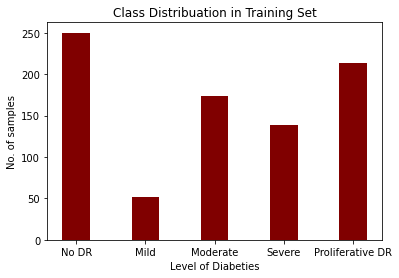

In [ ]:
plt.bar(class_name, train_cnt, color ='maroon',
        width = 0.4)
 
plt.xlabel("Level of Diabeties")
plt.ylabel("No. of samples")
plt.title("Class Distribuation in Training Set")
plt.show()

#### For Class Distribuation in Test Set

In [ ]:
test_cnt = [0, 0, 0, 0, 0]

for i in classes:
    test_cnt[i] = len(os.listdir(folder_path + "/TEST/TEST_" + str(i)))

test_cnt

[229, 116, 254, 54, 5]

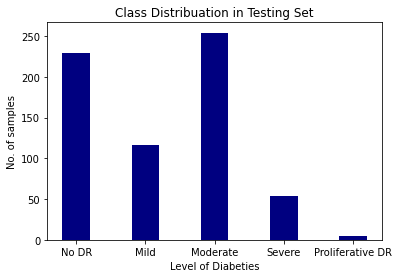

In [ ]:
plt.bar(class_name, test_cnt, color ='navy',
        width = 0.4)
 
plt.xlabel("Level of Diabeties")
plt.ylabel("No. of samples")
plt.title("Class Distribuation in Testing Set")
plt.show()

In [ ]:
# taking all images in X and y format

X_train = []
y_train = []
for i in classes:
    # y_train.append(i)
    imgs = list(os.listdir(folder_path + "/TRAIN/TRAIN_" + str(i)))
    for mg in imgs:
        X_train.append(cv2.resize(cv2.imread(folder_path+"/TRAIN/TRAIN_" + str(i)+"/"+mg), (1050, 1050)))
        y_train.append(i)

X_train = np.stack(X_train, axis=0)
y_train = np.array(y_train)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(827, 1050, 1050, 3)
(827,)


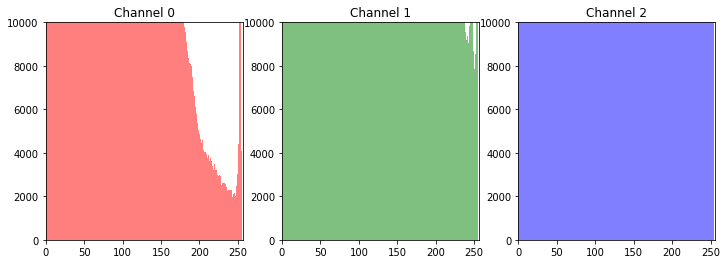

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
colors = ['r', 'g', 'b']
for i, ax in enumerate(axes.flat):
    ax.hist(X_train[:, :, :, i].flatten(), bins=256, color=colors[i], alpha=0.5)
    ax.set_xlim([0, 256])
    ax.set_ylim([0, 10000])
    ax.set_title(f"Channel {i}")
plt.show()